In [1]:
import sqlite3
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
conn = sqlite3.connect('/home/nick/Desktop/NUREU17/LSST/VariableStarClassification/features.db')
cur = conn.cursor()

In [3]:
df = pd.read_sql_query("select * from feats2", conn)

In [ ]:
sns.pairplot(df, vars = ('freq1_freq', 'skew', 'scatter_res_raw', 'stetson_j', 'amplitude'), diag_kind = 'hist')

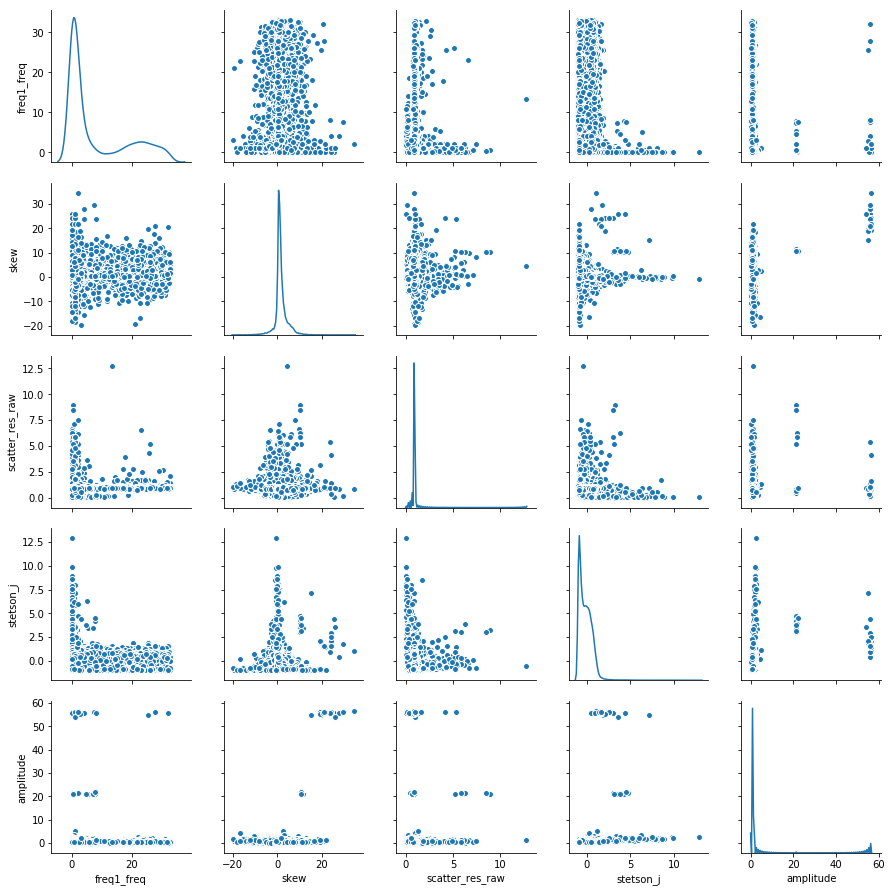

In [6]:
sns.pairplot(df, vars = ('freq1_freq', 'skew', 'scatter_res_raw', 'stetson_j', 'amplitude'), diag_kind = 'kde')

In [4]:
cur.execute("""select oid from feats2 where amplitude>10""")
t = cur.fetchall()

In [5]:
dt = df.assign(period = lambda x: 1/x['freq1_freq'])

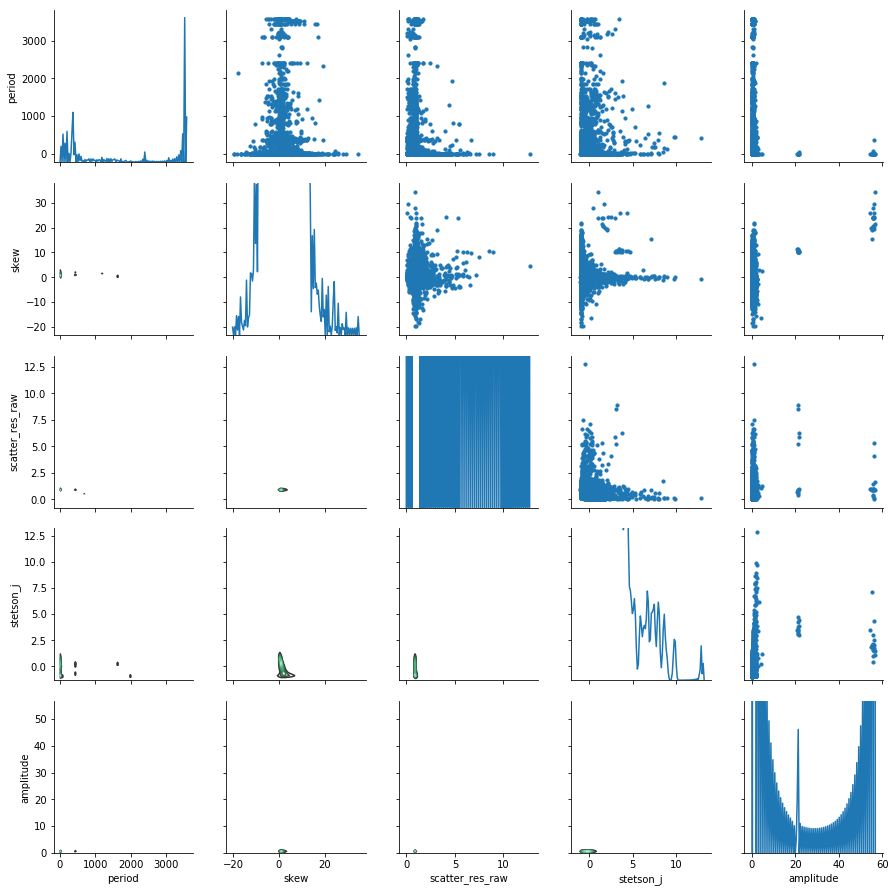

In [7]:
g = sns.PairGrid(dt, vars=('period', 'skew', 'scatter_res_raw', 'stetson_j', 'amplitude'))
g = g.map_upper(plt.scatter, s=10)
g = g.map_lower(sns.kdeplot)
g = g.map_diag(sns.kdeplot, legend= False)

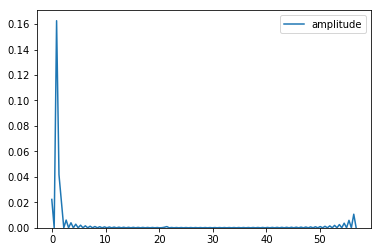

In [11]:
sns.kdeplot(dt['amplitude'])